In [52]:
#importing necessary libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [54]:
#loading the data

In [55]:
df=pd.read_csv('advertisement.csv')

In [56]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


we can see that 1st column is not necessary as it is just numbering

In [57]:
df= df.drop('Unnamed: 0',axis=1)

In [58]:
df.columns


Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [59]:
#gathering info about the data

In [60]:
df.shape

(200, 4)

In [61]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

all data are in float

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [63]:
#checing null values

In [64]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

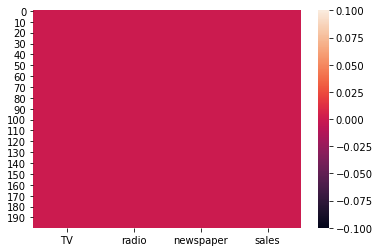

In [65]:
sns.heatmap(df.isnull())

no missing values

In [66]:
#Checking for skewness
df.skew()


TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

TV              AxesSubplot(0.125,0.125;0.168478x0.755)
radio        AxesSubplot(0.327174,0.125;0.168478x0.755)
newspaper    AxesSubplot(0.529348,0.125;0.168478x0.755)
sales        AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

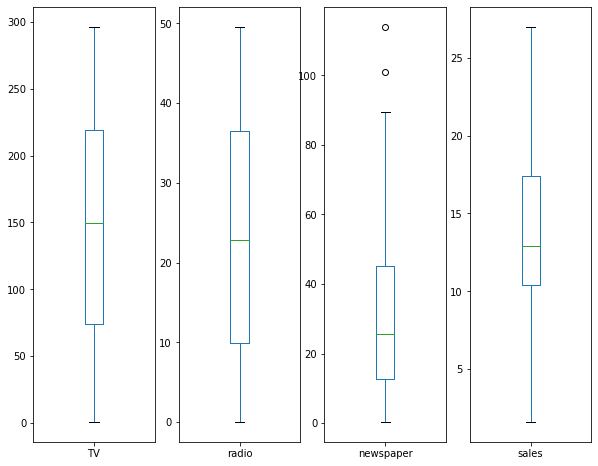

In [67]:
df.plot(kind='box',subplots=True,figsize=(10,8))

outlier is present in newpaper column

In [68]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [69]:
df1=df[(z<3).all(axis=1)]

In [70]:
df1

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [71]:
df.shape

(200, 4)

In [72]:
df1.shape

(198, 4)

In [73]:
#Percentage of data loss
(2/200)*100

1.0

only 1 percent of data is lost

In [74]:
#visualing the data 

<AxesSubplot:xlabel='TV', ylabel='Density'>

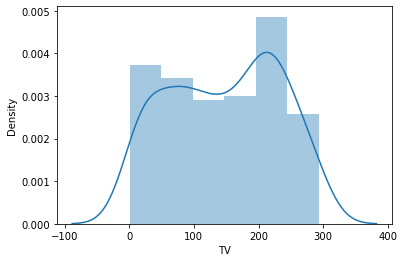

In [79]:
sns.distplot(df1['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

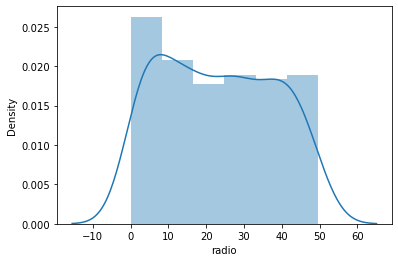

In [80]:
sns.distplot(df1['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

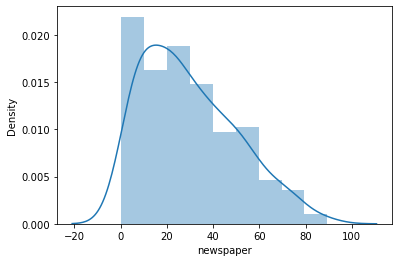

In [81]:
sns.distplot(df1['newspaper'])

<AxesSubplot:xlabel='sales', ylabel='Density'>

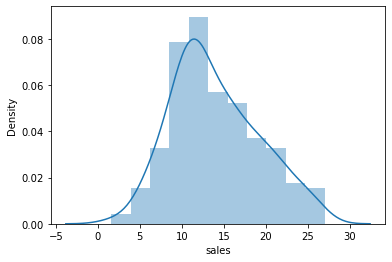

In [82]:
sns.distplot(df1['sales'])

Text(0, 0.5, 'Sales')

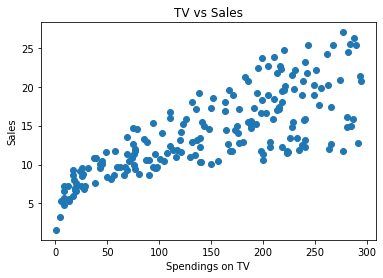

In [83]:
#let us see how each column is contributing to the sale
plt.scatter(x=df1['TV'],y=df1['sales'],)
plt.title("TV vs Sales")
plt.xlabel('Spendings on TV')
plt.ylabel('Sales')

sales is increasing when spending in tv

Text(0, 0.5, 'Sales')

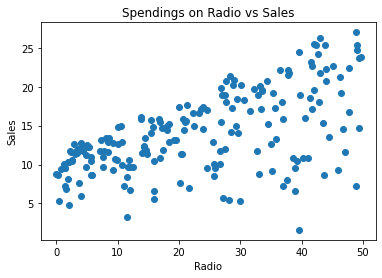

In [84]:
plt.scatter(x=df1['radio'],y=df1['sales'],)
plt.title("Spendings on Radio vs Sales")
plt.xlabel('Radio')
plt.ylabel('Sales')

no proper info but sales is increasing also

Text(0, 0.5, 'Sales')

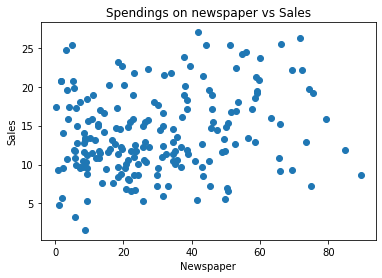

In [85]:
plt.scatter(x=df1['newspaper'],y=df1['sales'],)
plt.title("Spendings on newspaper vs Sales")
plt.xlabel('Newspaper')
plt.ylabel('Sales')

no proper info about sales

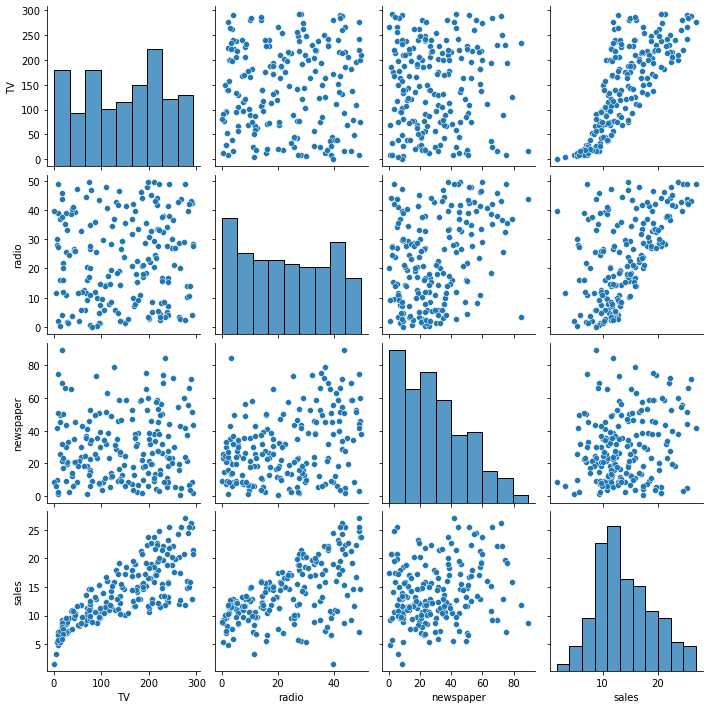

In [93]:
sns.pairplot(df1)

we can see that spending on TV, sales is increasing

sales in radio is moderate adn in newspaper, no proper data about sales

In [101]:
#checking for multicollinearity

In [102]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif['Variables']=x1.columns
    vif['vif Factor']=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [104]:
calc_vif(df1)

,Variables,vif Factor
0,TV,22.947317
1,radio,12.351976
2,newspaper,3.245537
3,sales,54.793972


In [105]:
#checking correlation
df1.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.049771,0.779121
radio,0.051978,1.000000,0.346364,0.576748
newspaper,0.049771,0.346364,1.000000,0.219555
sales,0.779121,0.576748,0.219555,1.000000


<AxesSubplot:>

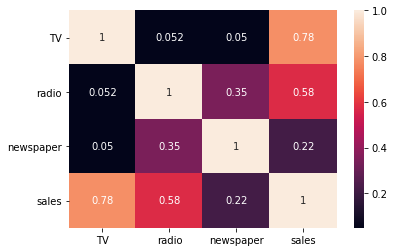

In [106]:
sns.heatmap(df1.corr(),annot=True)

In [107]:
#spliting the data into x and y

In [108]:
x=df1.iloc[:,:-1]
y=df1['sales']

In [109]:
x.shape

(198, 3)

In [110]:
y.shape

(198,)

In [111]:
#Scaling the features
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
x=min_max.fit_transform(x)

data is scaled

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.model_selection import train_test_split
m_mse=0
m_r2=0
rs=0
score=0
lr=LinearRegression()
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    sc=lr.score(x_train,y_train)
    mse=mean_squared_error(y_test,pred)
    r2=r2_score(y_test,pred)
    if mse>m_mse:
        m_mse=mse
        m_r2=r2
        rs=i
        score=sc
print(f"Score: {score}\n R2 score: {m_r2} \n Mean squared error: {m_mse} \n Random state: {rs}\n ")


Score: 0.9307415941669493
 R2 score: 0.7286891180016711 
 Mean squared error: 6.405681396042854 
 Random state: 447
 


In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=447)

In [127]:
#Importing different models 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [128]:
#List of models
models=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR()]
r2l=[]
msel=[]
for m in models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    sc=m.score(x_train,y_train)
    r2=r2_score(y_test,predm)
    mse=mean_squared_error(y_test,predm)
    msel.append(mse)
    r2l.append(r2)
    print(f"Metrics for model {m}:\n Score: {sc}\n Mean squared error: {mse}\n R2 score: {r2}")
    print('\n')
    

Metrics for model LinearRegression():
 Score: 0.9338646961189433
 Mean squared error: 5.9785285261294545
 R2 score: 0.7411999468268022


Metrics for model DecisionTreeRegressor():
 Score: 1.0
 Mean squared error: 1.3896666666666664
 R2 score: 0.9398437582668538


Metrics for model KNeighborsRegressor():
 Score: 0.9728577936636482
 Mean squared error: 3.032066666666667
 R2 score: 0.8687471321532635


Metrics for model SVR():
 Score: 0.9408438991904726
 Mean squared error: 4.6401066079347215
 R2 score: 0.7991378929423194




decision tree is giving 100% accuracy

In [129]:
#Cross validtion
from sklearn.model_selection import cross_val_score
cvm=[]
for m in models:
    cvscore=cross_val_score(m,x,y,cv=20)
    print(f"CV Scores of model {m}")
    print('Mean score:',cvscore.mean())
    print('Std:',cvscore.std())
    print('\n')
    cvm.append(cvscore.mean())

CV Scores of model LinearRegression()
Mean score: 0.8687388534565578
Std: 0.09323675522009907


CV Scores of model DecisionTreeRegressor()
Mean score: 0.9309094402945479
Std: 0.0531634508771862


CV Scores of model KNeighborsRegressor()
Mean score: 0.9456527398110997
Std: 0.03405181423739332


CV Scores of model SVR()
Mean score: 0.9268747407868576
Std: 0.06452992104195741




In [130]:
#Data frame with results
df2=pd.DataFrame({})
df2['Model']=models
df2['MSE']=msel
df2['R2 Score']=r2l
df2['CV Score']=cvm

In [131]:
df2

,Model,MSE,R2 Score,CV Score
0,LinearRegression(),5.978529,0.741200,0.868739
1,DecisionTreeRegressor(),1.389667,0.939844,0.930909
2,KNeighborsRegressor(),3.032067,0.868747,0.945653
3,SVR(),4.640107,0.799138,0.926875


Decision Tree has the less difference between R2 Score and CV Score

In [132]:
#Hyper parameter tuning on Desision tree
from sklearn.model_selection import GridSearchCV

args={'criterion':['squared_error', 'mse', 'friedman_mse', 'absolute_error', 'mae', 'poisson'],"splitter":['“best', 'random'],
     'max_depth':[1,10,100,1000,10000],'min_samples_split':[1,2,3,5,10,20,50,100,500],'min_weight_fraction_leaf':[0,0.1,0.01,0.001,0.0001],
     'random_state':[447]}

grid=GridSearchCV(DecisionTreeRegressor(),param_grid=args,cv=20)
grid.fit(x_train,y_train)
print('Best score:',grid.best_score_)
print('Best Estimator:',grid.best_estimator_)
print('Best parameter:',grid.best_params_)

Best score: 0.9196596470451851
Best Estimator: DecisionTreeRegressor(max_depth=10, min_samples_split=5,
                      min_weight_fraction_leaf=0, random_state=447,
                      splitter='random')
Best parameter: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0, 'random_state': 447, 'splitter': 'random'}


In [133]:
dtc=DecisionTreeRegressor(criterion= 'squared_error',max_depth= 100,min_samples_split= 3, 
                          min_weight_fraction_leaf= 0, random_state= 447, splitter= 'random')
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('Score:',dtc.score(x_train,y_train))
print("MSE:",mean_squared_error(y_test,pred))
print("R2 score:",r2_score(y_test,pred))

Score: 0.9977177605633737
MSE: 3.6635
R2 score: 0.8414134865032038


In [137]:
metric=pd.DataFrame({})
metric['Actual']=y_test
metric['Predicted']=pred

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

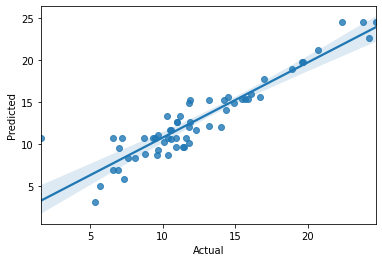

In [138]:
#Visualising 
sns.regplot(x="Actual", y="Predicted", data=metric)

we successfully created a model

In [139]:
#Saving the model
import joblib
joblib.dump(dtc,"Sales_Prediction.obj")

['Sales_Prediction.obj']